# Project Data Wrangling - Pacmann

Created by Rahman Aziz Firmansyah (AI/ML Engineering SU)

## 1. Project Objectives
[isi target yang ingin dicapai dalam proyek ini]

Data yang mungkin diperlukan:
- olist_order_items_dataset
    - kolom: product_id, seller_id, shipping_limit_date, price, freight_value
- olist_products_dataset
    - kolom[index]: product_id, product_category_name, product_description_length, product_photos_qty
- olist_order_reviews_dataset
    - kolom: order_id, review_score
- olist_order_payments
    - kolom: order_id, payment_sequential, payment_type, payment_installments, payment_value

Objectives:
1. Perusahaan ingin mengetahui produk apa yang paling banyak dibeli pelanggan
2. Total penjualan 10 produk yang paling banyak dibeli pelanggan
3. Mengidentifikasi 5 Produk yang mendapat review paling baik dari pelanggan
4. Mengidentifikasi korelasi antara durasi pengiriman dengan customer review score

## 2. Accessing Database
[akses database dan satukan tabel-tabel yang diperlukan dalam 1 file]

In [21]:
# import library required
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def store_df(table_name: str, dbname = 'olist.db'):
    '''
    converting table queried from database into dataframe
    params:
        query <str>\n
        database <str> (database's name)\n
    return: dataframe
    '''
    con = sqlite3.connect(dbname)
    cr = con.cursor()
    query = '''SELECT * FROM ''' + table_name
    cr.execute(query)

    res = cr.fetchall()
    cols = [col[0] for col in cr.description]

    return pd.DataFrame(res, columns = cols).drop('index', axis=1)

In [3]:
df_order_items = store_df('olist_order_items_dataset')
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
df_products = store_df('olist_products_dataset')
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [5]:
df_order_rev = store_df('olist_order_reviews_dataset')
df_order_rev.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [6]:
df_order_pyms = store_df('olist_order_payments_dataset')
df_order_pyms.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
df_category = store_df('product_category_name_translation')
df_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## 3. Data Exploration and Preprocessing
[lakukan proses-proses seperti data wrangling, data cleaning, data manipulation]

In [8]:
# merge data order dengan data product
df = df_order_items.merge(
                    df_products, 
                    how='left',
                    on='product_id'
                    )

df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [9]:
# merge data sebelumnya dengan category name in english
df = df.merge(
    df_category,
    how='left',
    on='product_category_name'
)

df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [10]:
# merge dengan order review
df = df.merge(
    df_order_rev,
    how='left',
    on='order_id'
    )

df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,28.0,9.0,14.0,cool_stuff,97ca439bc427b48bc1cd7177abe71365,5.0,None,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,50.0,30.0,40.0,pet_shop,7b07bacd811c4117b742569b04ce3580,4.0,None,None,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,33.0,13.0,33.0,furniture_decor,0c5b33dea94867d1ac402749e5438e8b,5.0,None,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,16.0,10.0,15.0,perfumery,f4028d019cb58564807486a6aaf33817,4.0,None,None,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,35.0,40.0,30.0,garden_tools,940144190dcba6351888cafa43f3a3a5,5.0,None,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


In [11]:
# merge df dengan order payments
df = df.merge(
    df_order_pyms,
    how='left',
    on='order_id'
)

df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,97ca439bc427b48bc1cd7177abe71365,5.0,None,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,7b07bacd811c4117b742569b04ce3580,4.0,None,None,2017-05-13 00:00:00,2017-05-15 11:34:13,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,0c5b33dea94867d1ac402749e5438e8b,5.0,None,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,f4028d019cb58564807486a6aaf33817,4.0,None,None,2018-08-15 00:00:00,2018-08-15 16:39:01,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,940144190dcba6351888cafa43f3a3a5,5.0,None,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,1.0,credit_card,3.0,218.04


untuk analisis lanjutan, kita copy dulu dataframe ke dalam variable baru untuk berjaga-jaga kalau data frame hasil merge yang belum dimodifikasi masih diperlukan.

In [12]:
df_origin = df.copy()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118310 entries, 0 to 118309
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118310 non-null  object 
 1   order_item_id                  118310 non-null  int64  
 2   product_id                     118310 non-null  object 
 3   seller_id                      118310 non-null  object 
 4   shipping_limit_date            118310 non-null  object 
 5   price                          118310 non-null  float64
 6   freight_value                  118310 non-null  float64
 7   product_category_name          116601 non-null  object 
 8   product_name_lenght            116601 non-null  float64
 9   product_description_lenght     116601 non-null  float64
 10  product_photos_qty             116601 non-null  float64
 11  product_weight_g               118290 non-null  float64
 12  product_length_cm             

kita ingin tahu produk apa yang paling banyak dibeli oleh pelanggan maka kita hanya perlu data ```product_id``` dan ```product_category_name_english```

In [14]:
df_most_ordered = df[['product_id', 'product_category_name_english']]
df_most_ordered.head()

,product_id,product_category_name_english
0,4244733e06e7ecb4970a6e2683c13e61,cool_stuff
1,e5f2d52b802189ee658865ca93d83a8f,pet_shop
2,c777355d18b72b67abbeef9df44fd0fd,furniture_decor
3,7634da152a4610f1595efa32f14722fc,perfumery
4,ac6c3623068f30de03045865e4e10089,garden_tools


## 4. Analysis
[gali informasi dan analisis dampaknya terhadap bisnis]

In [102]:
# 5 kategori produk paling banyak dibeli
most_ordered_cat = df_most_ordered\
    ['product_category_name_english']\
    .value_counts(normalize=True)\
    .reset_index()[:5]
most_ordered_cat

,index,product_category_name_english
0,bed_bath_table,0.102834
1,health_beauty,0.086055
2,sports_leisure,0.077237
3,furniture_decor,0.075762
4,computers_accessories,0.069911


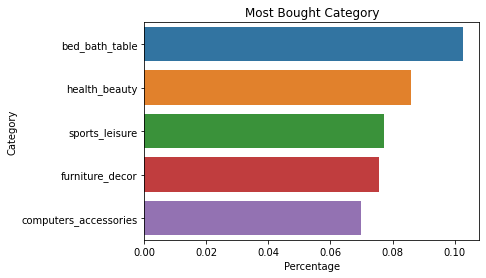

In [104]:
sns.barplot(
    data = most_ordered_cat,
    y = 'index',
    x = 'product_category_name_english'
)
plt.ylabel('Category')
plt.xlabel('Percentage')
plt.title('Most Bought Category')
plt.show()

In [38]:
# 5 produk yang paling banyak mendapatkan review baik dari pelanggan
df_rev_score = df[[
    'product_category_name_english', 
    'review_score'
    ]]

best_rev = df_rev_score\
    .groupby(['product_category_name_english'])\
    .mean()\
    .sort_values(by='review_score', ascending=False)[:5]\
    .reset_index()

best_rev

,product_category_name_english,review_score
0,cds_dvds_musicals,4.642857
1,fashion_childrens_clothes,4.500000
2,books_general_interest,4.438503
3,books_imported,4.419355
4,flowers,4.419355


mari kita bandingkan review score terbaik dengan review score barang yang paling banyak dibeli.

In [17]:
top_5 = ['bed_bath_table', 'health_beauty', 'sports_leisure', 'furniture_decor', 'computers_accessories']

In [49]:
most_bought = df_rev_score\
    .groupby(['product_category_name_english'])\
    .mean()\
    .loc[top_5, :]\
    .sort_values(by='review_score', ascending=False)\
    .reset_index()

most_bought

,product_category_name_english,review_score
0,health_beauty,4.137026
1,sports_leisure,4.107470
2,computers_accessories,3.936089
3,furniture_decor,3.912158
4,bed_bath_table,3.890605


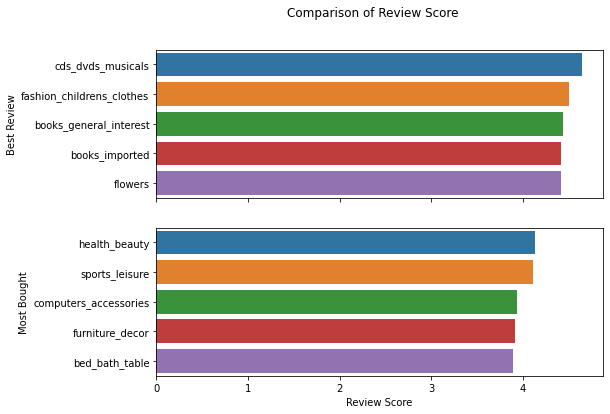

In [83]:
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8, 6))

sns.barplot(
    y = 'product_category_name_english', 
    x = 'review_score',
    data = best_rev,
    # hue = 'product_category_name_english', 
    ax=axs[0]
    )
axs[0].set_ylabel('Best Review')
axs[0].set_xlabel('')

sns.barplot(
    y = 'product_category_name_english', 
    x = 'review_score',
    data = most_bought,
    # hue = 'product_category_name_english',
    ax=axs[1],
    # palette= 'pastel'
    )
axs[1].set_ylabel('Most Bought')
axs[1].set_xlabel('Review Score')
fig.suptitle('Comparison of Review Score')
plt.show()

Barang-barang kecantikan dan kesehatan, perlengkapan olahraga, aksesoris komputer, furnitur paling banyak dibeli tetapi nilai ulasannya tidak lebih baik dari barang-barang lain yang jarang dibeli seperti cd, pakaian anak-anak, buku, dan bunga.